# A step by step HHL algorithm implementation

Recreation of the circuit used on the paper: https://arxiv.org/pdf/2108.09004 
<br> <br> First we do all the necessary imports.

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
from math import pi

We begin by creating our registers, adding them to the circuit, and doing the initialization of the $b$ register.

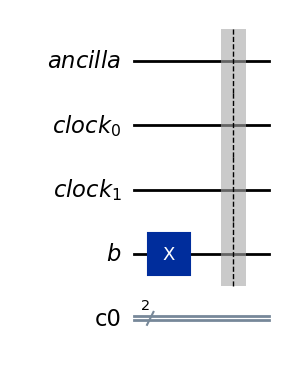

In [2]:
a = QuantumRegister(1, "ancilla")
cl = QuantumRegister(2, "clock")
b = QuantumRegister(1, "b")
c = ClassicalRegister(2)

qc = QuantumCircuit(a,cl,b,c)

qc.x(b[0])
qc.barrier()

qc.draw("mpl")

Now, we implement the Hadamard gates on both clock qubits.

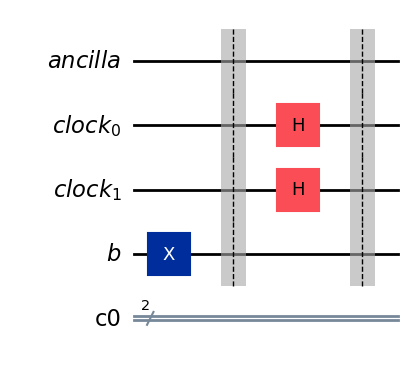

In [3]:
qc.h(cl[0])
qc.h(cl[1])
qc.barrier()

qc.draw("mpl")

Now we add the controlled rotations with the clock qubits as control and the $b$ qubits as target.

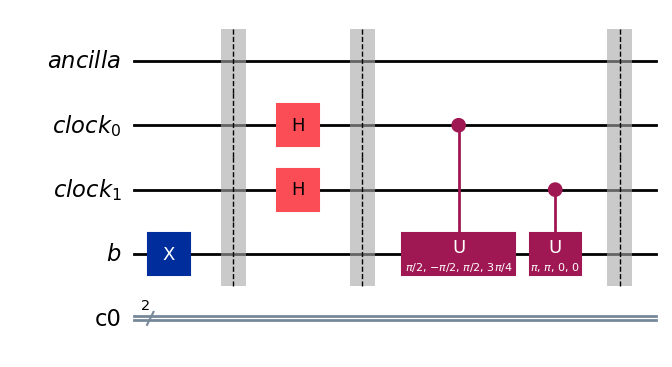

In [4]:
qc.cu(pi/2,-pi/2,pi/2,3*pi/4,cl[0],b[0])
qc.cu(pi,pi,0,0,cl[1],b[0])
qc.barrier()

qc.draw("mpl")

After that, we apply the gates corresponding to the Inversre Quantum Fourier transform to the clock qubits.

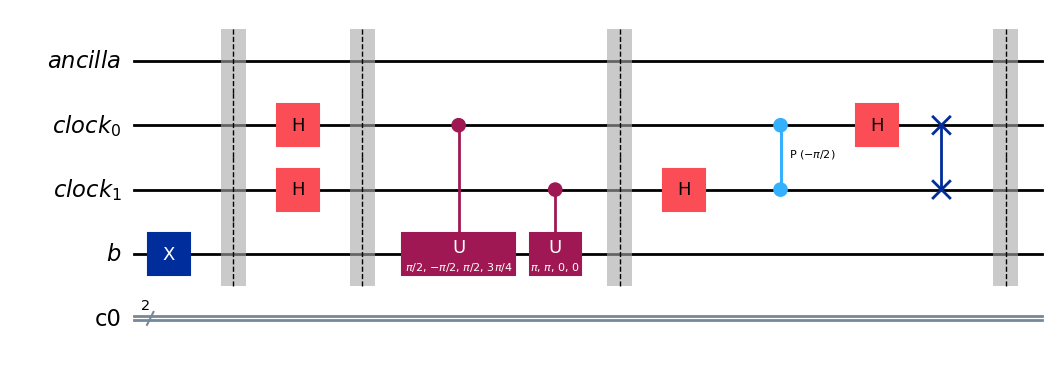

In [5]:
qc.h(cl[1])
qc.cp(-pi/2,cl[0],cl[1])
qc.h(cl[0])
qc.swap(cl[0], cl[1])
qc.barrier()

qc.draw("mpl")

The next step is implementing the controlled rotations on the ancilla qubit with the clock qubits as control.

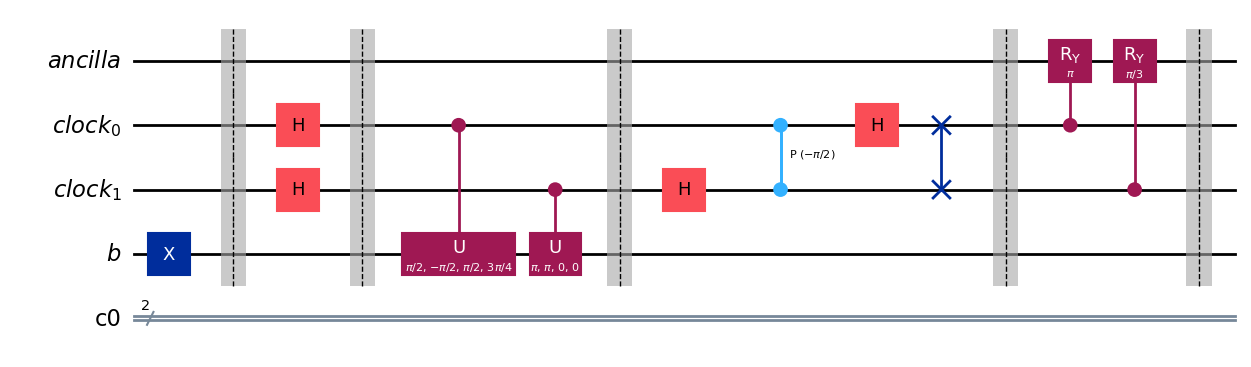

In [6]:
qc.cry(pi,cl[0],a)
qc.cry(pi/3,cl[1],a)
qc.barrier()

qc.draw("mpl")

The next step is the measurement of the ancilla qubit and the application of the QFT operator over the clock qubits.

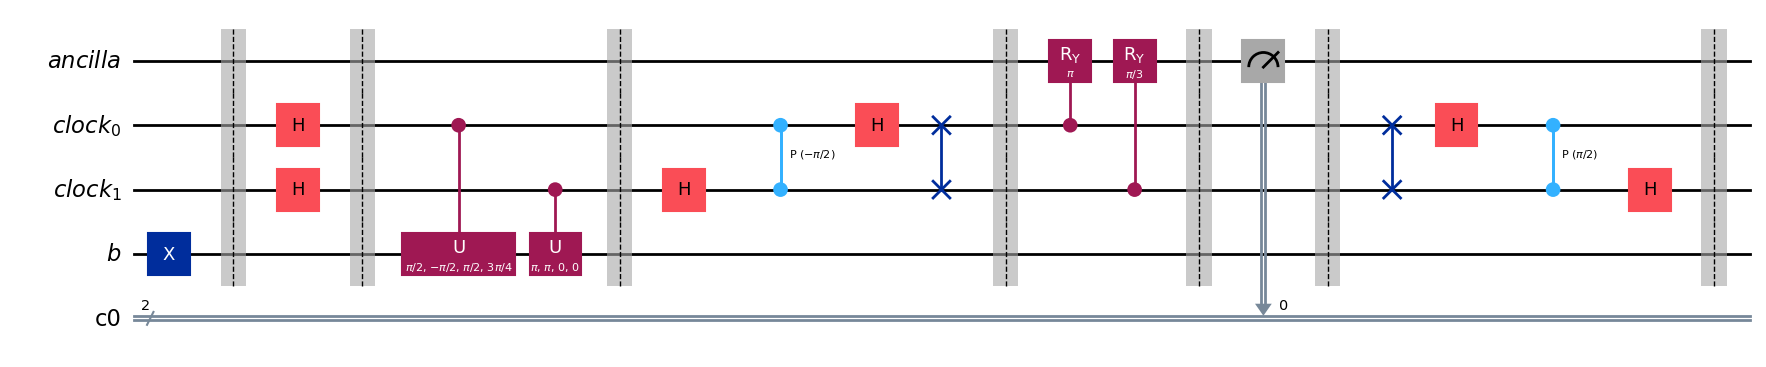

In [7]:
qc.measure(a,c[0])
qc.barrier()

qc.swap(cl[0],cl[1])
qc.h(cl[0])
qc.cp(pi/2,cl[0],cl[1])
qc.h(cl[1])
qc.barrier()

qc.draw("mpl")

We then apply the controlled rotations over the $b$ register with the clock qubits as the controls.

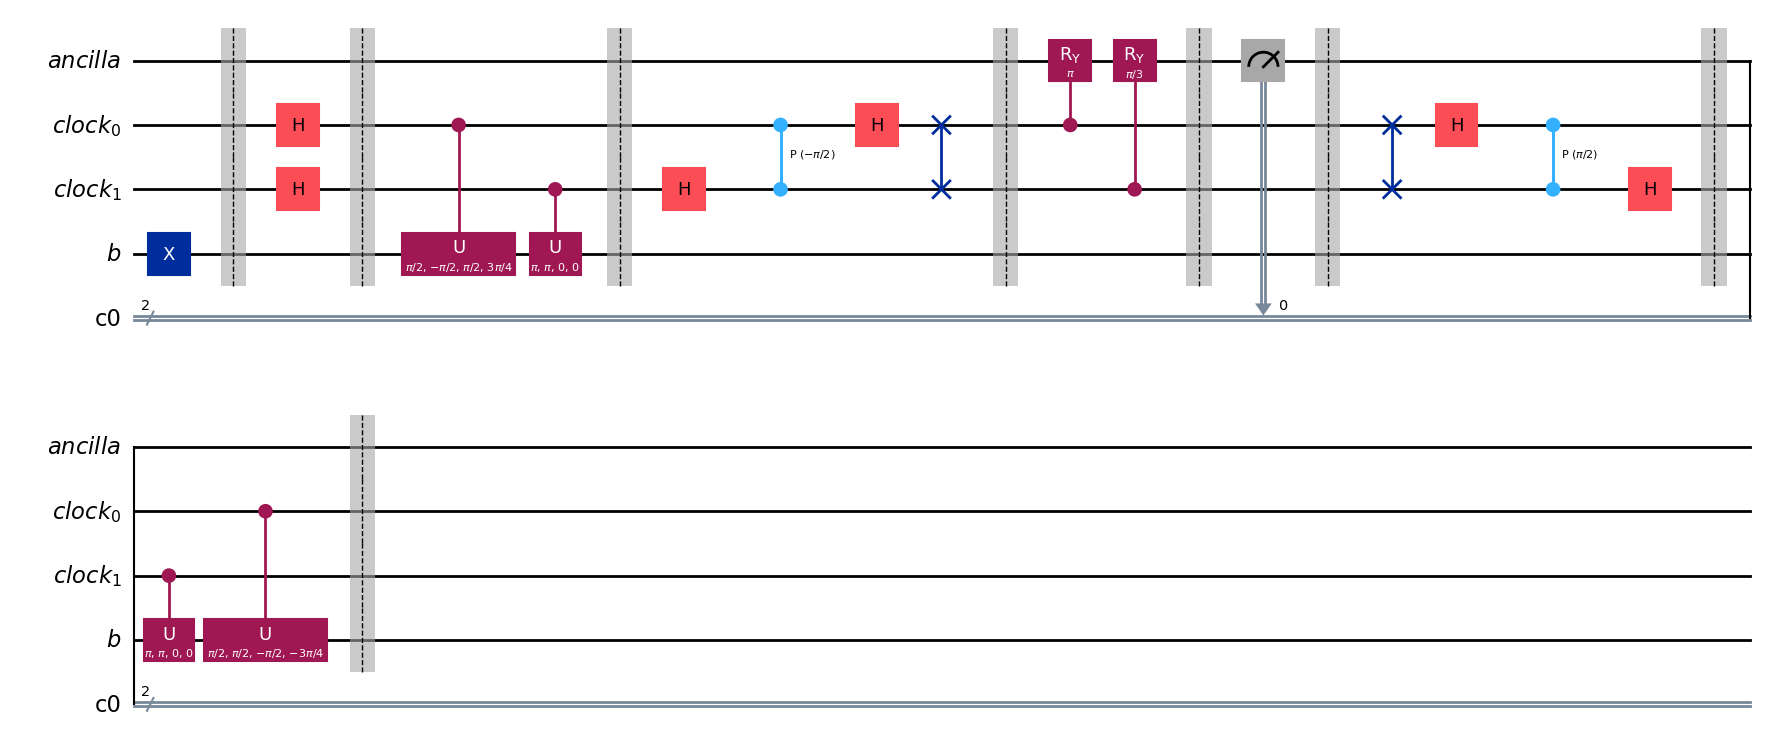

In [8]:
qc.cu(pi,pi,0,0,cl[1],b[0])
qc.cu(pi/2,pi/2,-pi/2,-3*pi/4,cl[0],b[0])
qc.barrier()

qc.draw("mpl")

Finally, we apply Hadamard gates over the clock qubits and measure the $b$ register, finishing the algorithm.

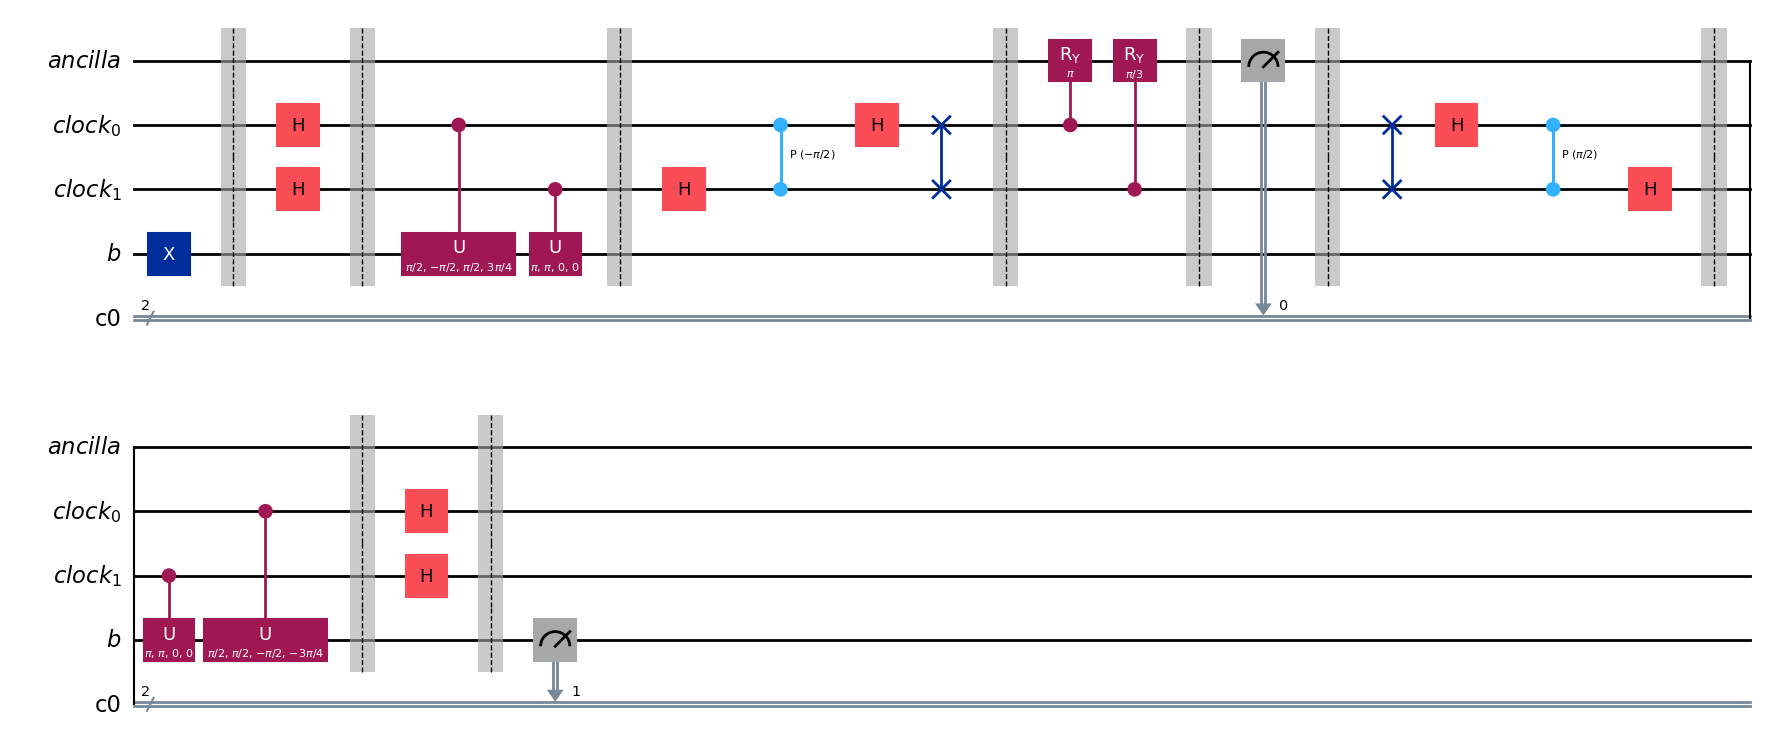

In [9]:
qc.h(cl[0])
qc.h(cl[1])
qc.barrier()

qc.measure(b[0],c[1])

qc.draw("mpl")

Now we execute the circuit and plot the results using the `AerSimulator()`.

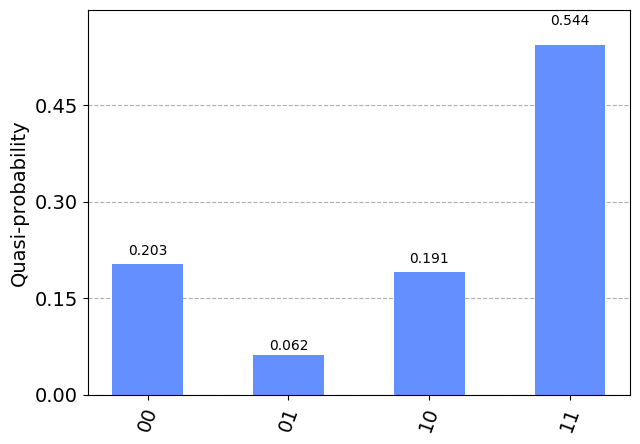

In [21]:
result = AerSimulator().run(qc, shots=1000).result()
statistics = result.get_counts()

plot_distribution(statistics)

## M: OGUNTUNNBI SEGUN

### HHL (Harrow-Hassidim-Lloyd) Algorithm

The HHL algorithm is a quantum algorithm that solves systems of linear equations, including wave equations. It was developed by Harrow, Hassidim, and Lloyd in 2009.

### Wave Equations

Wave equations are a fundamental type of partial differential equation (PDE) that describe the propagation of waves. They are commonly used to model various physical phenomena, such as:

**Quantum mechanics (Schrödinger equation)**

**Electromagnetism (Maxwell's equations)**

**Acoustics (wave propagation in fluids and solids)**

### Solving Wave Equations with HHL

The HHL algorithm can be used to solve wave equations by:
1. Discretization: Discretize the wave equation into a system of linear equations.
2. Quantization: Convert the linear system into a quantum system.
3. HHL Algorithm: Apply the HHL algorithm to solve the quantum system.
4. Post-processing: Extract the solution to the original wave equation from the output of the HHL algorithm.

#### Advantages

The HHL algorithm offers several advantages over classical methods for solving wave equations, including:

1. Exponential speedup: HHL can solve certain wave equations exponentially faster than classical methods.
2. High precision: HHL can provide highly accurate solutions, even for large systems.

#### Challenges

However, the HHL algorithm also has some challenges and limitations, including:

1. Noise and error correction: Quantum computers are prone to noise and errors, which can affect the accuracy of the solution.
2. Scalability: Currently, the HHL algorithm is limited to small-scale problems. Scaling up to larger problems is an active area of research.


Looking at the wave equation $\frac{d^2 \Psi}{dt^2} - {C^2}\frac{d^2 \Psi}{dr^2}  = 0$ to escribes how waves propagate in various media, including fluids and solids. In the context of acoustics, this equation can be used to model sound waves propagating through air or other materials.

## The 2D wave equation


We let$
u(x, y,t) $= deflection of membrane from equilibrium a 
positio$n (x, $y) a $time$
t.

For a fixed $t$, the surface $z = u(x, y,t)$ gives the shape of the
membrane at time $ $t

Under ideal assumptions (e.g. uniform membrane density, uniform
tension, no resistance to motion, small deflection, etc.) one can
show that u satisfies th*e two dimensional wave equati*on.

$Utt = C^2 \nabla^2 u = C^2(Uxx + Uyy)$  for 0 < x < a, 0 < y < b

For the derivation of the wave equation from Newton’s second
law *which state that the acceleration of an object is directly related to the not force and inversely related to its mass*

As in the one dimensional situation, the constant c has the
units of velocity. It is give by,

$C^2 = \frac{\tau}{\rho}$

where τ is the tension per unit length, and ρ is mass density

The operator $\nabla^2 = \frac{d^2}{dx^2} + \frac{d^2}{dy^2}$  

is called the *Laplacian*. It will appear in many of our
subsequent investigations.

The fact that we are keeping the edges of the membrane fixed is expressed by the boundary conditions. s

$u(0,y,t) = u(a,y,t) =0$       where                       $0 < y < b, t > 0,$ 

$u(x,0,t) = u(x,b,t) =0$       where                       $0 < x < a, t > 0,$

We must also specify how the membrane is initially deformed and
set into motion. This is done via the initial conditions

$u(x,y,0) = f(x,y)$       where                       $(x,y) \epsilon R $ 

$u(x,y,0) = g(x,y)$      where                       $(x,y) \epsilon R$

where $R = [0,a] * [0, b]$

Goal: Write down a solution to the wave equation (1) subject to
the boundary conditions (2) and initial conditions (3

Process: 
1. using separation of variables to produce simple solutions to
(1) and (2.

2. and then the principle of superposition to build up a
solution that satisfies (3) as well.ll.)

Assembling our results, we find that for any pair m, n ≥ 1 we have
the normal mod.
e

$Umn(x,y,t) = Xm(x)Yn(y)T(mn)(t)  = sin \mu x sin vnY(B(mn) cos \lambda (mn)t + B*mn sin\lambda (mn)t)$

where 

$\mu m = \frac{m\pi}{a}, Vn = {n\pi}{b}, \lambda mn = c \sqrt{\mu^2m + v^2n} $